In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data/full_clean_data.csv')

# Split the cpvCode column
data['cpv'] = data['cpvCode'].str.split('-', expand=True)[0]
data['cpvCheckDigit'] = data['cpvCode'].str.split('-', expand=True)[1]

data['cpvDivision'] = data['cpv'].str.slice(stop=2)
data['cpvGroup'] = data['cpv'].str.slice(stop=3)
data['cpvClass'] = data['cpv'].str.slice(stop=4)
data['cpvCategory'] = data['cpv'].str.slice(stop=5)

data = data.drop([
    'cpv',
    'cpvCheckDigit'
], axis=1)

# # add one-hot encoded columns to the remaining categorical data
# data_encoded = pd.get_dummies(data,
#                               columns=['cpvCode',
#                                        'cpvDivision',
#                                        'cpvGroup',
#                                        'cpvClass',
#                                        'cpvCategory',
#                                        'countyCode',
#                                        'cpvCodeType'])
# data = data_encoded

# apply Label Encoding to the categorical columns
columns_to_encode = ['noticeNo',
                     'title',
                     'currencyCode',
                     'publicationDate',
                     'contractingAuthorityName',
                     'cpvCodeName',
                     'cNoticeNo',
                     'cNoticePublicationDate',
                     'cNoticeTitle',
                     'organizationName',
                     'cpvCode',
                     'cpvDivision',
                     'cpvGroup',
                     'cpvClass',
                     'cpvCategory',
                     'countyCode',
                     'cpvCodeType']
label_encoder = LabelEncoder()
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

data.to_csv('data/full_encoded_data.csv', index=False)

data

,noticeNo,contractValue,title,currencyCode,publicationDate,countyCode,contractingAuthorityName,cpvCodeName,cpvCode,cpvCodeType,cNoticeNo,cNoticeEstimatedContractValue,cNoticePublicationDate,cNoticeTitle,organizationName,organizationId,cpvDivision,cpvGroup,cpvClass,cpvCategory
0,20022,133657.00,13374,0,14808,11,658,620,1067,1,19983,153780.00,15826,13055,1862,91285,19,101,273,549
1,20025,151470.00,11992,0,14808,32,1431,85,305,0,19797,152340.00,15633,11500,7954,239573,0,2,10,38
2,20024,850446.00,11063,0,14808,18,1423,926,405,1,19987,850446.12,15830,10024,1569,287074,1,8,31,85
3,20020,720948.00,16517,0,14808,18,1423,47,540,1,20023,720948.00,15867,419,4127,292011,4,25,85,180
4,20009,28510.00,10109,0,14808,17,1003,850,828,1,19869,45000.00,15719,9513,8156,293608,11,59,165,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20022,100,240631.20,11664,0,45,33,85,855,684,1,74,301539.00,73,11141,6554,77258,10,48,132,285
20023,62,238200.00,11565,0,40,3,1448,908,465,1,990,238200.00,775,11021,7471,1063,1,10,41,119
20024,40,65000.00,15129,0,32,18,497,892,384,1,891,65000.00,702,14989,5057,61650,1,7,28,76
20025,44,963067.32,2030,0,30,19,1006,824,957,1,656,1801498.00,553,2127,5358,77200,16,87,227,466


Accuracy: 0.12
Precision: 0.80
Recall: 0.15
F1 Score: 0.03


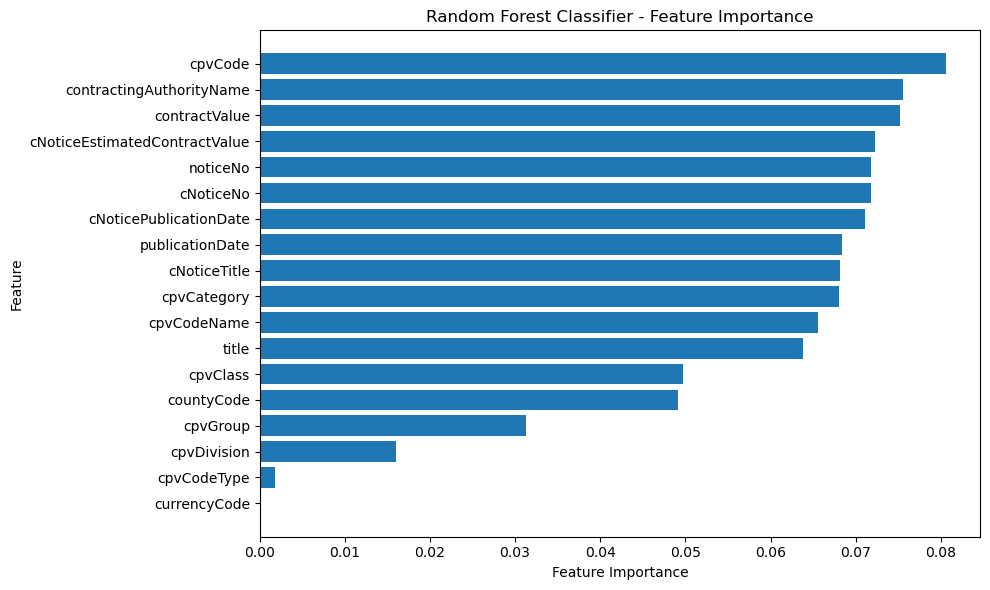

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
# 1. Import necessary libraries and modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 2. Load and preprocess data
data = pd.read_csv('data/full_encoded_data.csv')
X = data.drop(['organizationId', 'organizationName'], axis=1)
y = data['organizationId']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the model
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# 5. Train the model on the training data
clf.fit(X_train, y_train)

# Once the model is created, we can conduct feature importance and plot it on a graph to interpret the results easily.
# Get feature importances
importance_scores = clf.feature_importances_
feature_names = X.columns

# Sort feature importance scores and feature names
sort_indices = importance_scores.argsort()
importance_scores_sorted = importance_scores[sort_indices]
feature_names_sorted = feature_names[sort_indices]

# 6. Evaluate the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro')

# 7. Print the performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importance_scores_sorted)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Classifier - Feature Importance")
plt.tight_layout()
plt.show()


In [12]:
# 1. Import necessary libraries and modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 2. Load and preprocess data
data = pd.read_csv('data/full_encoded_data.csv')
X = data.drop(['organizationId', 'organizationName'], axis=1)
y = data['organizationId']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the model
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12)
# 10 - works
# 20 - crashes
# 15 - crashes
# 13 - crashes
# 11 - works
# 12 - works (MAX)

# 5. Train the model on the training data
clf.fit(X_train, y_train)

# Once the model is created, we can conduct feature importance and plot it on a graph to interpret the results easily.
# Get feature importances
importance_scores = clf.feature_importances_
feature_names = X.columns

# Sort feature importance scores and feature names
sort_indices = importance_scores.argsort()
importance_scores_sorted = importance_scores[sort_indices]
feature_names_sorted = feature_names[sort_indices]

# 6. Evaluate the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro')

# 7. Print the performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.14
Precision: 0.74
Recall: 0.21
F1 Score: 0.05
